# *Importing Libraries*

In [55]:
#Importing Libraries

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error,recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.impute import KNNImputer, SimpleImputer

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,GradientBoostingClassifier, GradientBoostingRegressor


import warnings
warnings.filterwarnings('ignore')



# *Importing Dataset*

In [56]:
data=sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [57]:
#Checking for missing values
data.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [58]:
categoric_cols=[ 'sex', 'embarked', 'class', 'who','adult_male', 'deck', 'embark_town','alone','alive']

#Imputing missing values using Simple Imputer

imputer = SimpleImputer(strategy='most_frequent')

data[categoric_cols] = imputer.fit_transform(data[categoric_cols])

In [59]:
numeric_cols= ['age']

#Imputing missing values using KNN Imputer

imputer = KNNImputer(n_neighbors=5)

data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

data


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [60]:
#Using Label Encoder for categorical columns
label_encoder = LabelEncoder()
for col in categoric_cols:
    data[col] = label_encoder.fit_transform(data[col])
    
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.000000,1,0,7.2500,2,2,1,1,2,2,0,0
1,1,1,0,38.000000,1,0,71.2833,0,0,2,0,2,0,1,0
2,1,3,0,26.000000,0,0,7.9250,2,2,2,0,2,2,1,1
3,1,1,0,35.000000,1,0,53.1000,2,0,2,0,2,2,1,0
4,0,3,1,35.000000,0,0,8.0500,2,2,1,1,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,1,1,1,2,2,0,1
887,1,1,0,19.000000,0,0,30.0000,2,0,2,0,1,2,1,1
888,0,3,0,29.699118,1,2,23.4500,2,2,2,0,2,2,0,0
889,1,1,1,26.000000,0,0,30.0000,0,0,1,1,2,0,1,1


<Axes: xlabel='fare'>

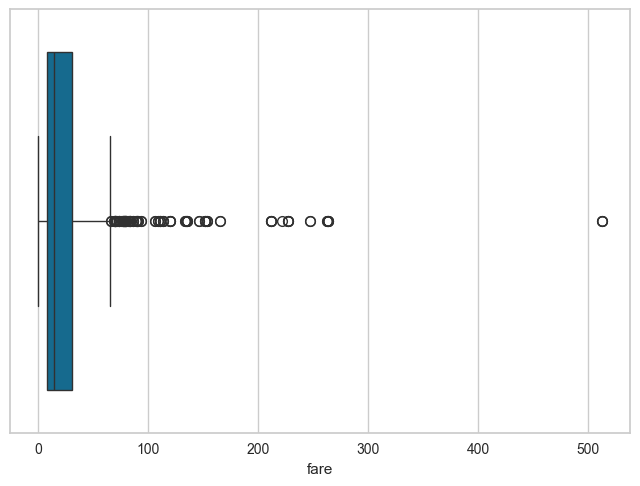

In [61]:
sns.boxplot(x='fare', data=data)

<Axes: xlabel='age'>

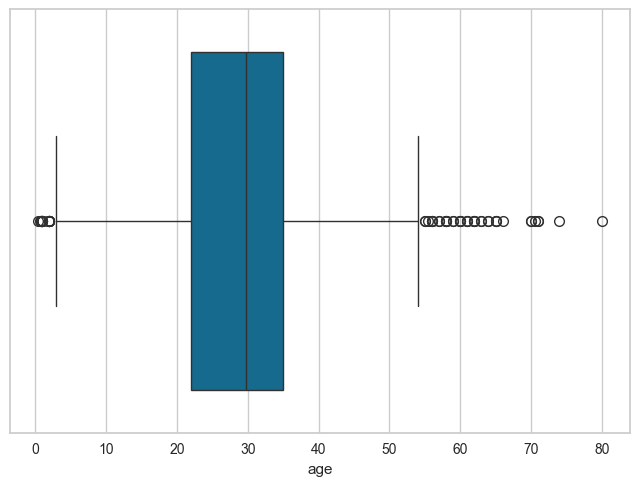

In [62]:
sns.boxplot(x='age', data=data)

In [63]:
cols_with_outliers = ['age','fare']

#Using Robust Scaler to handle outliers
scaler = RobustScaler()

data[cols_with_outliers] = scaler.fit_transform(data[cols_with_outliers])

data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,-0.592240,1,0,-0.312011,2,2,1,1,2,2,0,0
1,1,1,0,0.638529,1,0,2.461242,0,0,2,0,2,0,1,0
2,1,3,0,-0.284548,0,0,-0.282777,2,2,2,0,2,2,1,1
3,1,1,0,0.407760,1,0,1.673732,2,0,2,0,2,2,1,0
4,0,3,1,0.407760,0,0,-0.277363,2,2,1,1,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,-0.207624,0,0,-0.062981,2,1,1,1,2,2,0,1
887,1,1,0,-0.823009,0,0,0.673281,2,0,2,0,1,2,1,1
888,0,3,0,0.000000,1,2,0.389604,2,2,2,0,2,2,0,0
889,1,1,1,-0.284548,0,0,0.673281,0,0,1,1,2,0,1,1


In [64]:
cols_with_outliers = ['pclass','sex','sibsp','parch','embarked','class','who','adult_male','deck','embark_town','alone','alive']

#Using MinMax Scaler for other categorical columns
scaler = MinMaxScaler()

data[cols_with_outliers] = scaler.fit_transform(data[cols_with_outliers])
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,1.0,1.0,-0.592240,0.125,0.000000,-0.312011,1.0,1.0,0.5,1.0,0.333333,1.0,0.0,0.0
1,1,0.0,0.0,0.638529,0.125,0.000000,2.461242,0.0,0.0,1.0,0.0,0.333333,0.0,1.0,0.0
2,1,1.0,0.0,-0.284548,0.000,0.000000,-0.282777,1.0,1.0,1.0,0.0,0.333333,1.0,1.0,1.0
3,1,0.0,0.0,0.407760,0.125,0.000000,1.673732,1.0,0.0,1.0,0.0,0.333333,1.0,1.0,0.0
4,0,1.0,1.0,0.407760,0.000,0.000000,-0.277363,1.0,1.0,0.5,1.0,0.333333,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.5,1.0,-0.207624,0.000,0.000000,-0.062981,1.0,0.5,0.5,1.0,0.333333,1.0,0.0,1.0
887,1,0.0,0.0,-0.823009,0.000,0.000000,0.673281,1.0,0.0,1.0,0.0,0.166667,1.0,1.0,1.0
888,0,1.0,0.0,0.000000,0.125,0.333333,0.389604,1.0,1.0,1.0,0.0,0.333333,1.0,0.0,0.0
889,1,0.0,1.0,-0.284548,0.000,0.000000,0.673281,0.0,0.0,0.5,1.0,0.333333,0.0,1.0,1.0


In [65]:
#Dropping 'alive' column from the dataset for no data leakage
data = data.drop('alive', axis=1)


In [ ]:
#Using PyCaret for selecting best model
from pycaret.classification import *
clf1=setup(data=data, target='survived', session_id=0)
models=compare_models()
                                   

In [70]:
tuned_gb = tune_model(GradientBoostingClassifier(), optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7937,0.8494,0.7500,0.7200,0.7347,0.5660,0.5663
1,0.7778,0.8526,0.7083,0.7083,0.7083,0.5288,0.5288
2,0.8730,0.9252,0.7500,0.9000,0.8182,0.7219,0.7289
3,0.7903,0.7915,0.6522,0.7500,0.6977,0.5384,0.5415
4,0.8710,0.8914,0.9167,0.7857,0.8462,0.7362,0.7427
5,0.7742,0.8295,0.6250,0.7500,0.6818,0.5090,0.5141
6,0.7581,0.8026,0.6667,0.6957,0.6809,0.4862,0.4865
7,0.8871,0.9167,0.8333,0.8696,0.8511,0.7602,0.7607
8,0.8065,0.8821,0.8750,0.7000,0.7778,0.6101,0.6220


Fitting 10 folds for each of 10 candidates, totalling 100 fits


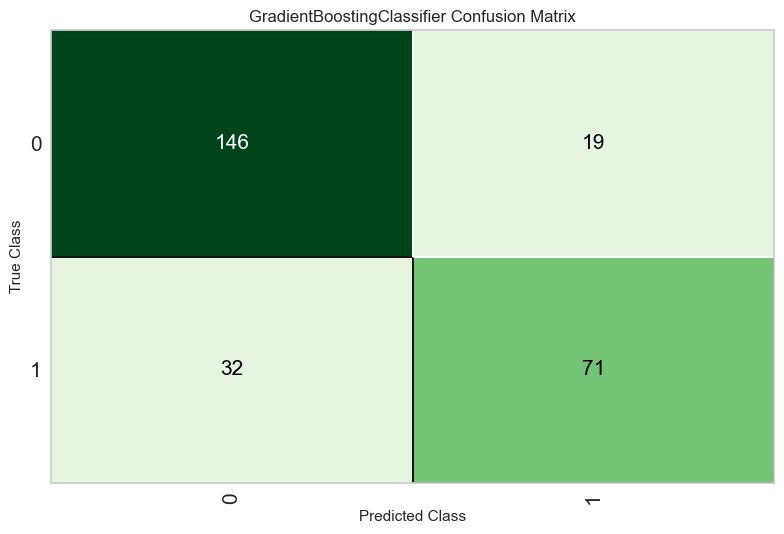

In [ ]:
#Confusion Matrix
plot_model(tuned_gb, plot='confusion_matrix')

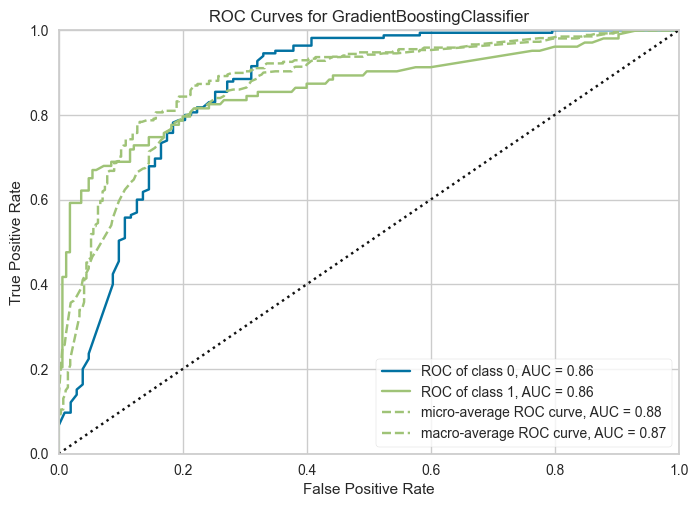

In [ ]:
#ROC Curve
plot_model(tuned_gb)

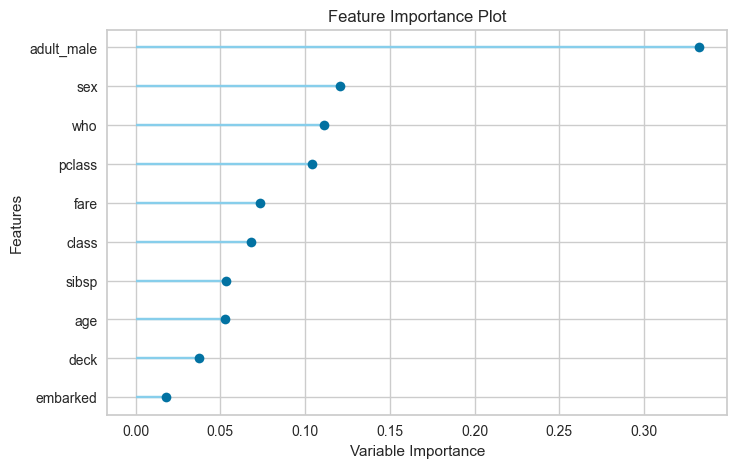

In [78]:
#Fetures
plot_model(tuned_gb, plot='feature')

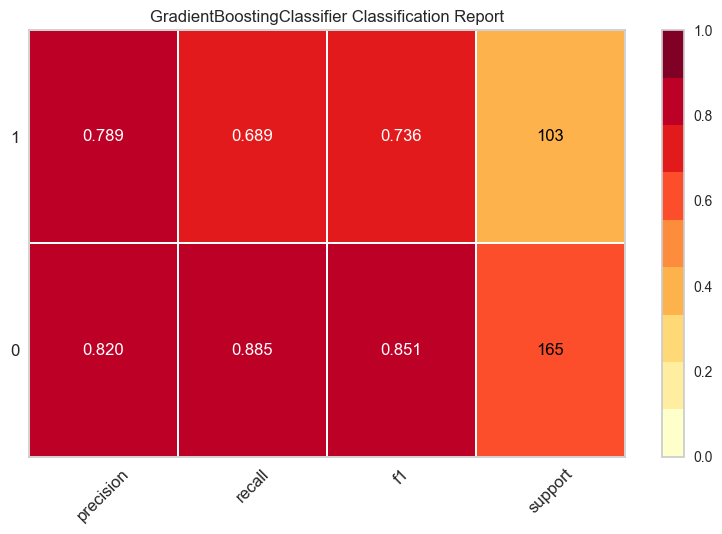

In [80]:
plot_model(tuned_gb, plot='class_report')